In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

In [14]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 50
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)
adjacencyMatrix = np.random.rand(num_agents, num_agents)
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 5000
lecture_duration = 50
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
initial_emotion_mu = 0.6
initial_emotion_sigma = 2


# ========================updating adjacency matrix=======================
updateAdj = True
friendship_increase = 0.1
my_lambda = 0.9



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 0.8
initial_emotion_teacher = 0.9
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 5
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters fpr the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = True
group_num = 5




# ===========================run model===============================
test_model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
test_model.run_model()

In [15]:
test_res = test_model.datacollector.get_model_vars_dataframe()
print(test_res)

      Attendance                                    adjacencyMatrix
0           0.52  [[0.19141319934819212, 0.34886512230402345, 0....
1           0.52  [[0.19141319934819212, 0.34886512230402345, 0....
2           0.52  [[0.19141319934819212, 0.34886512230402345, 0....
3           0.52  [[0.19141319934819212, 0.34886512230402345, 0....
4           0.52  [[0.19141319934819212, 0.34886512230402345, 0....
...          ...                                                ...
5095        0.46  [[0.19141319934819212, 0.34886512230402345, 0....
5096        0.46  [[0.19141319934819212, 0.34886512230402345, 0....
5097        0.46  [[0.19141319934819212, 0.34886512230402345, 0....
5098        0.46  [[0.19141319934819212, 0.34886512230402345, 0....
5099        0.46  [[0.19141319934819212, 0.34886512230402345, 0....

[5100 rows x 2 columns]


In [16]:
test_agent_res = test_model.datacollector.get_agent_vars_dataframe()
print(test_agent_res)

               Emotion
Step AgentID          
0    0        0.000000
     1        0.000000
     2        1.000000
     3        0.460873
     4        1.000000
...                ...
5000 46       0.000000
     47       0.000000
     48       0.905290
     49       0.000000
     50       0.900000

[255051 rows x 1 columns]


In [17]:
test_agent_res = test_agent_res.reset_index()
print(test_agent_res)

        Step  AgentID   Emotion
0          0        0  0.000000
1          0        1  0.000000
2          0        2  1.000000
3          0        3  0.460873
4          0        4  1.000000
...      ...      ...       ...
255046  5000       46  0.000000
255047  5000       47  0.000000
255048  5000       48  0.905290
255049  5000       49  0.000000
255050  5000       50  0.900000

[255051 rows x 3 columns]


In [18]:
temp_step = test_agent_res.loc[test_agent_res['Step'] == 0]
print(temp_step)

    Step  AgentID   Emotion
0      0        0  0.000000
1      0        1  0.000000
2      0        2  1.000000
3      0        3  0.460873
4      0        4  1.000000
5      0        5  1.000000
6      0        6  0.000000
7      0        7  0.000000
8      0        8  0.000000
9      0        9  1.000000
10     0       10  1.000000
11     0       11  0.000000
12     0       12  0.000000
13     0       13  1.000000
14     0       14  1.000000
15     0       15  1.000000
16     0       16  1.000000
17     0       17  1.000000
18     0       18  1.000000
19     0       19  0.000000
20     0       20  1.000000
21     0       21  0.430619
22     0       22  0.000000
23     0       23  0.000000
24     0       24  1.000000
25     0       25  0.000000
26     0       26  1.000000
27     0       27  0.000000
28     0       28  0.000000
29     0       29  0.283010
30     0       30  0.773161
31     0       31  1.000000
32     0       32  0.107672
33     0       33  0.000000
34     0       34  1

In [19]:
temp_step = test_agent_res.loc[test_agent_res['Step'] == 1]
print(temp_step)

     Step  AgentID   Emotion
51      1        0  0.000000
52      1        1  0.000000
53      1        2  0.999002
54      1        3  0.460873
55      1        4  0.999277
56      1        5  0.999877
57      1        6  0.000000
58      1        7  0.000000
59      1        8  0.000000
60      1        9  0.999939
61      1       10  0.999817
62      1       11  0.000000
63      1       12  0.000000
64      1       13  0.998984
65      1       14  0.999033
66      1       15  0.999573
67      1       16  0.999918
68      1       17  0.999955
69      1       18  0.999956
70      1       19  0.000000
71      1       20  0.999992
72      1       21  0.430619
73      1       22  0.000000
74      1       23  0.000000
75      1       24  0.999729
76      1       25  0.000000
77      1       26  0.999980
78      1       27  0.000000
79      1       28  0.000000
80      1       29  0.283010
81      1       30  0.774015
82      1       31  0.999964
83      1       32  0.107672
84      1     

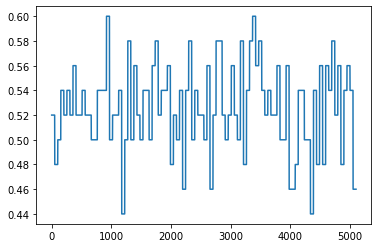

In [20]:
plt.plot(test_res['Attendance'])